In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading Data
Data = pd.read_csv('zameen-property-data.csv')
Data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2/4/2019,NaN,NaN
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,5/4/2019,NaN,NaN
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,4/5/2019,NaN,NaN
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director


In [3]:
# Dropping Unnecessary Columns
Data = Data.drop('property_id',axis=1)
Data = Data.drop('location_id',axis=1)
Data = Data.drop('page_url',axis=1)
Data = Data.drop('area',axis=1)
Data = Data.drop('purpose',axis=1)
Data = Data.drop('date_added',axis=1)
Data = Data.drop('agency',axis=1)
Data = Data.drop('agent',axis=1)
Data = Data.drop('province_name',axis=1)
Data = Data.drop('location',axis=1)
Data.head()

,property_type,price,city,latitude,longitude,baths,bedrooms
0,Flat,10000000,Islamabad,33.679890,73.012640,2,2
1,Flat,6900000,Islamabad,33.700993,72.971492,3,3
2,House,16500000,Islamabad,33.631486,72.926559,6,5
3,House,43500000,Islamabad,33.707573,73.151199,4,4
4,House,7000000,Islamabad,33.492591,73.301339,3,3


In [4]:
Data.describe()
# Data.tail()

,price,latitude,longitude,baths,bedrooms
count,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.776576e+07,29.859519,71.239804,2.874227,3.179422
std,3.531003e+07,3.807870,3.133042,2.463400,1.971401
min,0.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.750000e+05,24.948536,67.130363,0.000000,2.000000
50%,8.500000e+06,31.459784,73.056182,3.000000,3.000000
75%,1.950000e+07,33.560887,73.259870,4.000000,4.000000
max,2.000000e+09,73.184088,80.161430,403.000000,68.000000


In [5]:
#Converting String into Numeric For Further processing For Property type

Data.property_type[Data.property_type == 'Flat'] = 0.1
Data.property_type[Data.property_type == 'House'] = 0.5
Data.property_type[Data.property_type == 'Penthouse'] = 1
Data.property_type[Data.property_type == 'Farm House'] = 0.7
Data.property_type[Data.property_type == 'Lower Portion'] = 0.8
Data.property_type[Data.property_type == 'Upper Portion'] = 1
Data.property_type[Data.property_type == 'Room'] = 2

#Converting String into Numeric For Further processing For City
Data.city[Data.city == 'Islamabad'] = 0.1
Data.city[Data.city == 'Lahore'] = 0.5
Data.city[Data.city == 'Faisalabad'] = 1
Data.city[Data.city == 'Rawalpindi'] = 0.7
Data.city[Data.city == 'Karachi'] = 0.8


C:\Users\Yousuf\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yousuf\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Yousuf\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [6]:
Data.head(50)

,property_type,price,city,latitude,longitude,baths,bedrooms
0,0.1,10000000,0.1,33.679890,73.012640,2,2
1,0.1,6900000,0.1,33.700993,72.971492,3,3
2,0.5,16500000,0.1,33.631486,72.926559,6,5
3,0.5,43500000,0.1,33.707573,73.151199,4,4
4,0.5,7000000,0.1,33.492591,73.301339,3,3
5,0.5,34500000,0.1,33.623947,73.126588,8,8
6,0.5,27000000,0.1,33.579034,73.139591,8,8
7,0.1,7800000,0.1,33.698244,72.984238,2,2
8,0.5,50000000,0.1,33.540894,73.095732,7,7
9,1,40000000,0.1,33.679211,72.988787,5,5


In [7]:
BHNames= ['property_type','price','city','latitude','longitude','baths',
         'bedrooms']

In [8]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(Data))
DataScaled = scaler.fit_transform(Data)
DataScaled = pd.DataFrame(DataScaled,columns=BHNames)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [9]:
DataScaled

,property_type,price,city,latitude,longitude,baths,bedrooms
0,0.000000,0.00500,0.000000,0.364186,0.868238,0.004963,0.029412
1,0.000000,0.00345,0.000000,0.364525,0.867480,0.007444,0.044118
2,0.210526,0.00825,0.000000,0.363406,0.866652,0.014888,0.073529
3,0.210526,0.02175,0.000000,0.364631,0.870792,0.009926,0.058824
4,0.210526,0.00350,0.000000,0.361171,0.873559,0.007444,0.044118
...,...,...,...,...,...,...,...
168441,0.210526,0.01325,0.777778,0.224965,0.759946,0.000000,0.088235
168442,0.210526,0.00625,0.777778,0.224773,0.759931,0.000000,0.044118
168443,0.210526,0.01350,0.777778,0.224732,0.759561,0.000000,0.088235
168444,0.210526,0.00550,0.777778,0.224697,0.759644,0.000000,0.044118


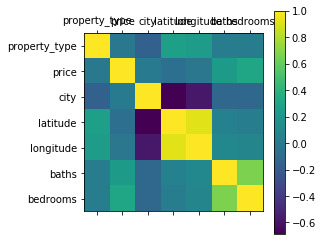

In [10]:
# Now Finding the correlation between different variables
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    
    
    plt.matshow(CorData)
    plt.xticks(range(len(CorData.columns)), CorData.columns)
    plt.yticks(range(len(CorData.columns)), CorData.columns)
    plt.colorbar()
    plt.show()

In [11]:
#Seperating Train & Test data

from sklearn.model_selection import train_test_split

X = DataScaled.drop('price', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['price']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X shape =  (168446, 6)
Y shape =  (168446,)
X train shape =  (117912, 6)
X test shape =  (50534, 6)
Y train shape =  (117912,)
Y test shape =  (50534,)


In [16]:
X # independent variable

,property_type,city,latitude,longitude,baths,bedrooms
0,0.000000,0.000000,0.364186,0.868238,0.004963,0.029412
1,0.000000,0.000000,0.364525,0.867480,0.007444,0.044118
2,0.210526,0.000000,0.363406,0.866652,0.014888,0.073529
3,0.210526,0.000000,0.364631,0.870792,0.009926,0.058824
4,0.210526,0.000000,0.361171,0.873559,0.007444,0.044118
...,...,...,...,...,...,...
168441,0.210526,0.777778,0.224965,0.759946,0.000000,0.088235
168442,0.210526,0.777778,0.224773,0.759931,0.000000,0.044118
168443,0.210526,0.777778,0.224732,0.759561,0.000000,0.088235
168444,0.210526,0.777778,0.224697,0.759644,0.000000,0.044118


In [17]:
Y # Dependent Variable

0         0.00500
1         0.00345
2         0.00825
3         0.02175
4         0.00350
           ...   
168441    0.01325
168442    0.00625
168443    0.01350
168444    0.00550
168445    0.00450
Name: price, Length: 168446, dtype: float64

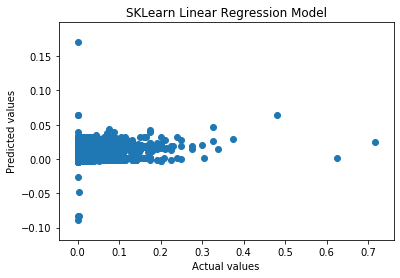

Linear Regression Model Mean Square Error
0.00025213967051185293


In [22]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)

